# Blackbody

A [blackbody](http://en.wikipedia.org/wiki/Black_body) or *planckian radiator* is and ideal thermal radiator that absorbs completely all incident radiation, whatever the wavelength, the direction of incidence or the polarization. <a name="back_reference_1"></a><a href="#reference_1">[1]</a>

A *blackbody* in [thermal equilibrium](http://en.wikipedia.org/wiki/Thermal_equilibrium) emits electromagnetic radiation called [blackbody radiation](http://en.wikipedia.org/wiki/Black-body_radiation).

## Planck's Law

The spectral radiance of a blackbody at thermodynamic temperature $T [K]$ in a medium having index of refraction $n$ is given by the [Planck's law](http://en.wikipedia.org/wiki/Planck%27s_law) equation: <a name="back_reference_2"></a><a href="#reference_2">[2]</a>

$$
\begin{equation}
L_{e\lambda}(\lambda,T)=\cfrac{C_1n^{-2}\lambda^{-5}}{\pi}{\Biggl[\exp\biggl(\cfrac{C_2}{n\lambda T}\biggr)-1\Biggr]^{-1}}
\end{equation}
$$
where
$$
\begin{equation}
\begin{aligned}
C_1&=2\pi hc^2\\
C_2&=\cfrac{hc}{k}
\end{aligned}
\end{equation}
$$

$h$ is Planck's constant, $c$ is the speed of light in vacuum, $k$ is the Boltzmann constant and $\lambda$ is the wavelength.

As per *CIE 015:2004 Colorimetry, 3rd Edition* recommendation $C_2$ value when used in colorimetry should be $C_2= 1,4388x10^{-2}mK$ as defined by the International Temperature Scale (ITS-90).

$C_1$ value is given by the Committee on Data for Science and Technology (CODATA) and should be $C_1=3,741771x10^{16}Wm^2$.

In the current *CIE 015:2004 Colorimetry, 3rd Edition* recommendation, colour temperature and correlated colour temperature are calculated with $n=1$.

[Colour](https://github.com/colour-science/colour/) implements some *blackbody* related objects available in *colour.colorimetry* sub-package:

In [1]:
import colour.colorimetry

> Note: *colour.colorimetry* package public API is also available from the *colour* namespace.

The *Planck's law* is called using either the *colour.planck_law* or  *colour.blackbody_spectral_radiance* definitions, they are expecting the wavelength $\lambda$ to be in nanometers and the temperature $T$ to be in degree kelvin:

In [2]:
%matplotlib inline

In [3]:
import colour

colour.filter_warnings(True, False)

colour.planck_law(500 * 1e-9, 5500)

20472701909806.578

Generating the spectral power distribution of a *blackbody* is done using the *colour.blackbody_spectral_power_distribution* definition:

In [4]:
colour.blackbody_spd(6500, colour.SpectralShape(0, 10000, 10))

SpectralPowerDistribution(
    '6500K Blackbody',
    {0.0: nan,
     10.0: 8.7735104836052218e-73,
     20.0: 3.1944815736288712e-26,
     30.0: 4.4265945761744381e-11,
     40.0: 0.0010775536249445754,
     50.0: 22.621766942961568,
     60.0: 14556.113210985197,
     70.0: 1309744.4600851273,
     80.0: 34985102.890165657,
     90.0: 420046800.68415284,
     100.0: 2901696185.9261074,
     110.0: 13477912744.377352,
     120.0: 46661455155.90564,
     130.0: 129235956781.10002,
     140.0: 301066152004.41138,
     150.0: 611816160142.87329,
     160.0: 1114373366845.7654,
     170.0: 1857016695096.6094,
     180.0: 2876459320941.8398,
     190.0: 4193189456568.062,
     200.0: 5809602732604.5615,
     210.0: 7710670657511.1357,
     220.0: 9866470806128.1367,
     230.0: 12235787154439.562,
     240.0: 14770071291621.924,
     250.0: 17417232434449.139,
     260.0: 20124919825122.477,
     270.0: 22843131739841.199,
     280.0: 25526113386023.234,
     290.0: 28133590059589.293,
   

With its temperature lowering, the blackbody peak shifts to longer wavelengths while its intensity also decreases:

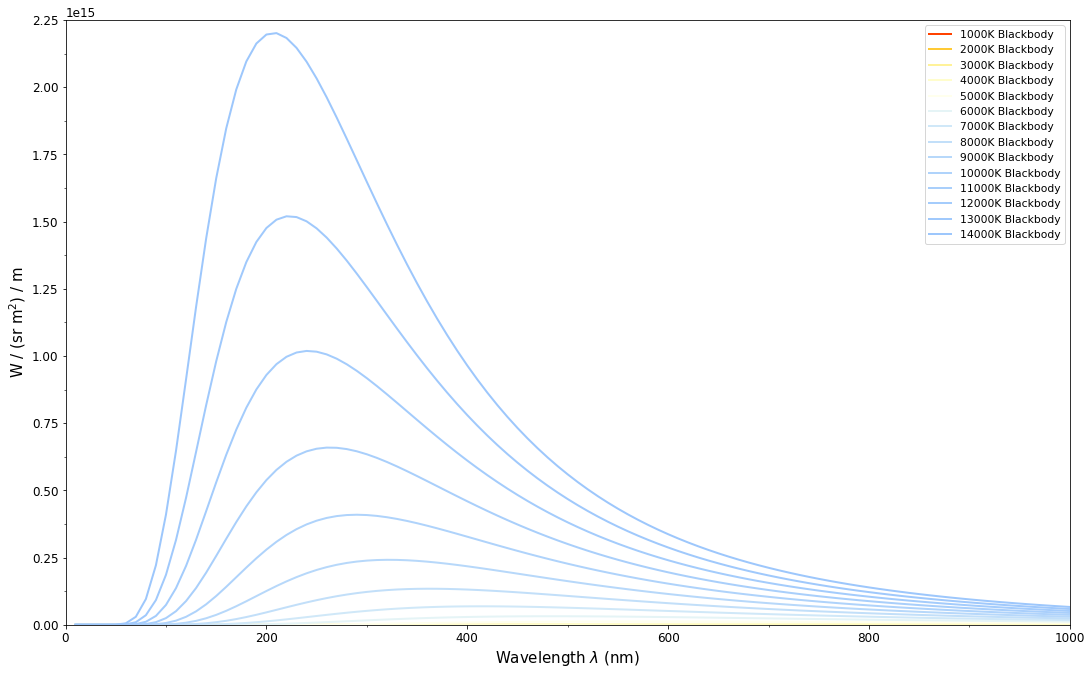

In [5]:
from colour.plotting import *

colour_plotting_defaults()

# Plotting various *blackbodies* spectral power distributions.
blackbodies_spds = [colour.blackbody_spd(i, colour.SpectralShape(0, 10000, 10)) 
                    for i in range(1000, 15000, 1000)]
multi_spd_plot(blackbodies_spds,
               y_label='W / (sr m$^2$) / m',
               use_spds_colours=True,
               normalise_spds_colours=True,
               legend_location='upper right',
               bounding_box=[0, 1000, 0, 2.25e15])

Let's plot the blackbody colours from temperature in domain [150, 12500, 50]:

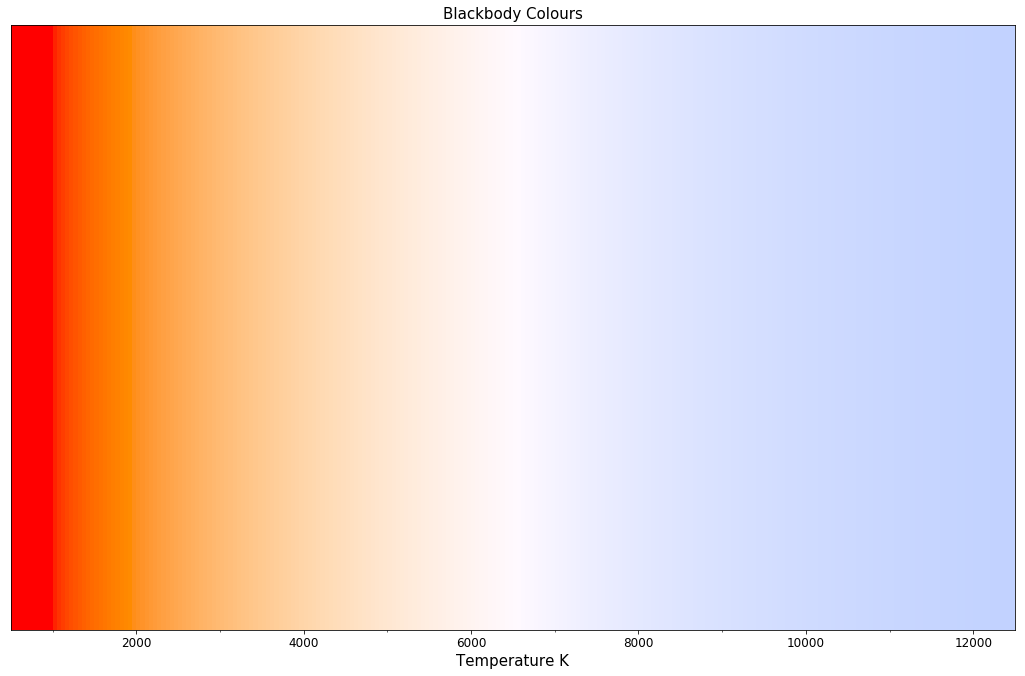

In [6]:
blackbody_colours_plot(colour.SpectralShape(500, 12500, 50))

## Stars Colour

Let's compare the extraterrestrial solar spectral irradiance to the blackbody spectral radiance of a thermal radiator with a temperature of 5778 K:

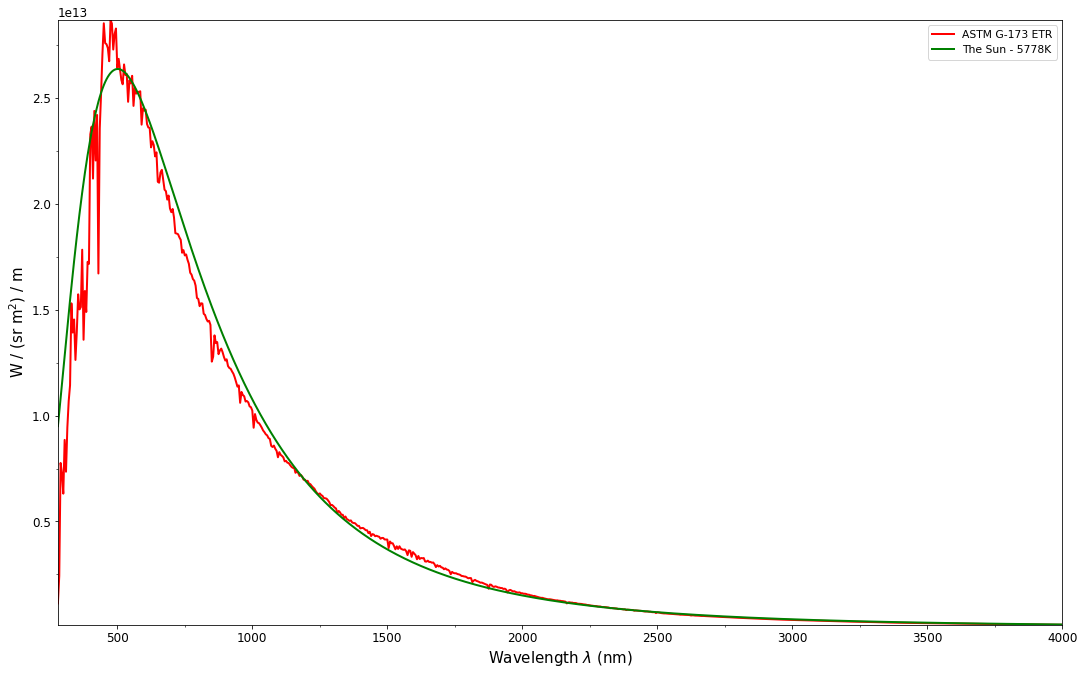

In [7]:
# Comparing theoretical and measured *Sun* spectral distributions.
# Arbitrary ASTM_G_173_ETR scaling factor calculated with
# :def:`colour.spectral_to_XYZ` definition.
ASTM_G_173_spd = ASTM_G_173_ETR.clone() * 1.37905559e+13

ASTM_G_173_spd.interpolate(colour.SpectralShape(interval=5), method='Linear')

blackbody_spd = colour.blackbody_spd(
    5778,
    ASTM_G_173_spd.shape)
blackbody_spd.name = 'The Sun - 5778K'

multi_spd_plot([ASTM_G_173_spd, blackbody_spd],
               y_label='W / (sr m$^2$) / m',
               legend_location='upper right')

As you can see the *Sun* spectral power distribution is very close to the one from a blackbody at similar temperature $T$.

Calculating theoritical colour of any star is possible, like for instance the [VY Canis Majoris](http://en.wikipedia.org/wiki/VY_Canis_Majoris) red hypergiant in the constellation *Canis Major*.

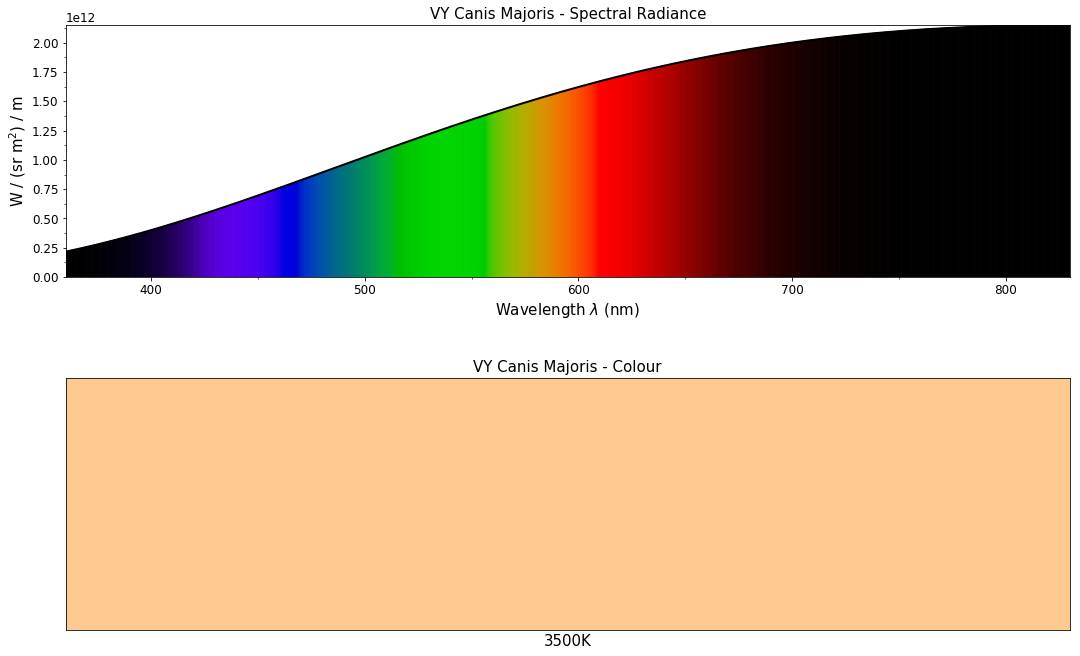

In [8]:
blackbody_spectral_radiance_plot(temperature=3500, blackbody='VY Canis Majoris')

Or [Rigel](http://en.wikipedia.org/wiki/Rigel) the brightest star in the constellation *Orion* and the seventh brightest star in the night sky.

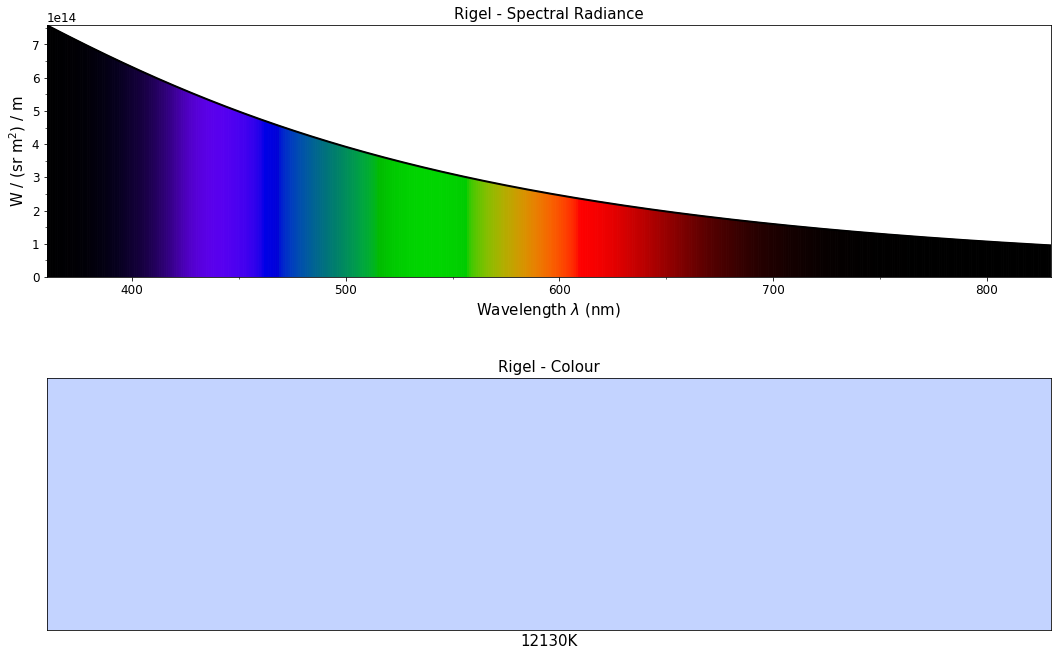

In [9]:
blackbody_spectral_radiance_plot(temperature=12130, blackbody='Rigel')

And finally the [Sun](http://en.wikipedia.org/wiki/Sun), our star:

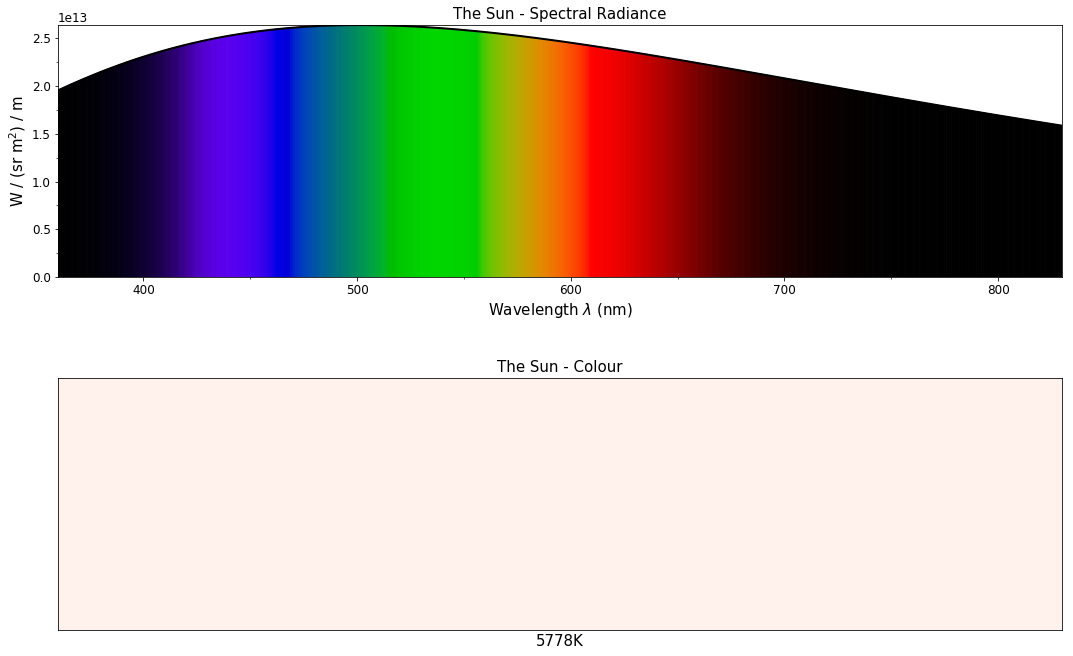

In [10]:
blackbody_spectral_radiance_plot(temperature=5778, blackbody='The Sun')

## Bibliography

1. <a href="#back_reference_1">^<a> <a name="reference_1"></a>CIE. (n.d.). 17-960 Planckian radiator. Retrieved June 26, 2014, from http://eilv.cie.co.at/term/960
2. <a href="#back_reference_2">^<a> <a name="reference_2"></a>CIE TC 1-48. (2004). APPENDIX E. INFORMATION ON THE USE OF PLANCK’S EQUATION FOR STANDARD AIR. In *CIE 015:2004 Colorimetry, 3rd Edition* (pp. 77–82). ISBN:978-3-901-90633-6